**Importing The Modules**

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import exposure
import imutils
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

**Load the data**

In [2]:
data = fetch_openml("mnist_784", version=1)
print(data)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

**Shape of the data**

In [3]:
data.data.shape

(70000, 784)

**Plotting greyscale images**

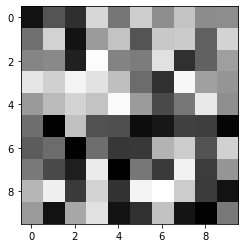

In [4]:
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [5]:
x = data.data 
y = data.target

**Plotting a random image**

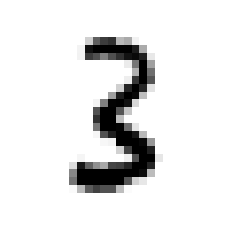

In [6]:
some_digit = x.to_numpy()[50000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap="binary")
plt.axis("off")
plt.show()

**Splitting our data into training and testing:**

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(y_train)
print(y_test)

(56000, 784) (56000,)
(14000, 784) (14000,)
43395    4
34399    9
24774    6
52089    7
15390    5
        ..
21243    7
45891    8
42613    7
43567    1
68268    1
Name: class, Length: 56000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
10840    0
56267    4
14849    1
62726    2
47180    7
        ..
29357    3
52488    2
9603     7
34949    4
25193    6
Name: class, Length: 14000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


**Data Scaling**

In [8]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**Training our model on all possible K values (odd) from 3 to 20**

In [9]:
kVals = np.arange(3,20,2)
accuracies = []
for k in kVals:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9444285714285714
K = 5; Accuracy: 0.9445
K = 7; Accuracy: 0.9435714285714286
K = 9; Accuracy: 0.9412857142857143
K = 11; Accuracy: 0.9395
K = 13; Accuracy: 0.9371428571428572
K = 15; Accuracy: 0.9362857142857143
K = 17; Accuracy: 0.9334285714285714
K = 19; Accuracy: 0.9317857142857143


In [10]:
model = KNeighborsClassifier(n_neighbors = 5) 
model.fit(x_train, y_train) 
pred = model.predict(x_test)

*As we can see the model is the most accurate at K(n_neighbors) = 5 i.e 94%*

**Accuracy plotting**

Text(0, 0.5, 'Accuracy')

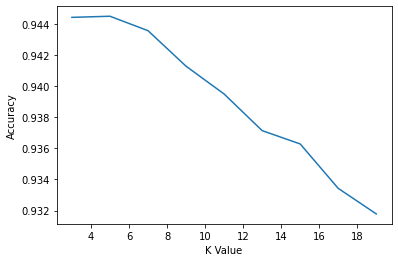

In [11]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

**Checking for Underfitting/Overfitting**

In [13]:
print("Training set score: {:.4f}".format(model.score(x_train,y_train)))

print("Test set score: {:.4f}".format(model.score(x_test,y_test)))

Training set score: 0.9637
Test set score: 0.9445


**Classification Report(Precision, Recall, F1 Score)**

In [14]:
print("Classification Report:\n",classification_report(y_test, pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1387
           1       0.95      0.99      0.97      1580
           2       0.94      0.93      0.94      1443
           3       0.92      0.94      0.93      1435
           4       0.95      0.93      0.94      1350
           5       0.93      0.92      0.93      1231
           6       0.96      0.97      0.97      1387
           7       0.94      0.94      0.94      1458
           8       0.97      0.90      0.93      1368
           9       0.91      0.92      0.92      1361

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



**Confusion Matrix**

Text(33.0, 0.5, 'Actual Category ')

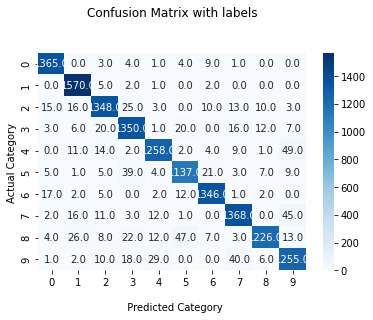

In [15]:
#creating confusion matrix 
cm = confusion_matrix(y_test, pred)

##Generating heatmap to visualize the confusion matrix
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")

##Setting up the title and Labels
ax.set_title('Confusion Matrix with labels\n\n')
ax.set_xlabel('\n  Predicted Category')
ax.set_ylabel('Actual Category ')


*KNN Model with 5 neighbors performed really well with 94% accuracy.*

**Results**

The digit is: 2


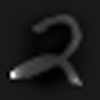

The digit is: 6


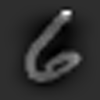

The digit is: 3


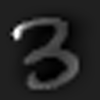

The digit is: 7


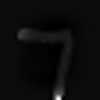

The digit is: 0


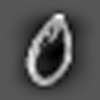

The digit is: 4


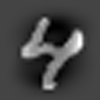

In [52]:
for i in list(map(int, np.random.randint(0, high=len(y_test), size=(6,)))):
	image = x_test[i]
	prediction = model.predict(image.reshape(1, -1))[0]

	image = image.reshape((28, 28))
	image = exposure.rescale_intensity(image, out_range=(0, 255))
	image = imutils.resize(image, width=100, inter=cv2.INTER_CUBIC)

	print("The digit is: {}".format(prediction))
	cv2_imshow(image)
	cv2.waitKey(0)

**Saving the Trained Model using Pickle**

In [16]:
import pickle
filename = 'mnistdigit_model.sav'
pickle.dump(model, open(filename, 'wb'))

***Thank You!!!***